In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, f1_score, roc_auc_score,
                             precision_recall_fscore_support)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


In [3]:

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Get features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)


Shape of the dataset: (303, 14)

Column Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Missing Values p

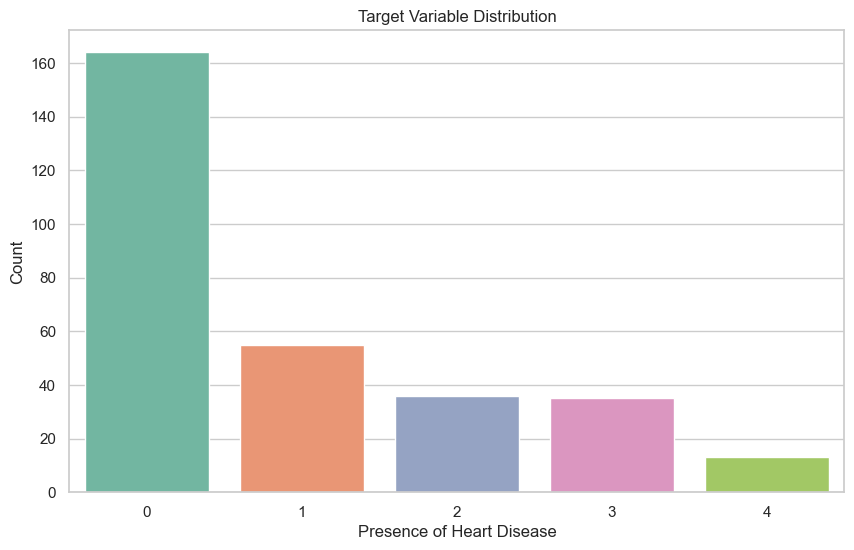

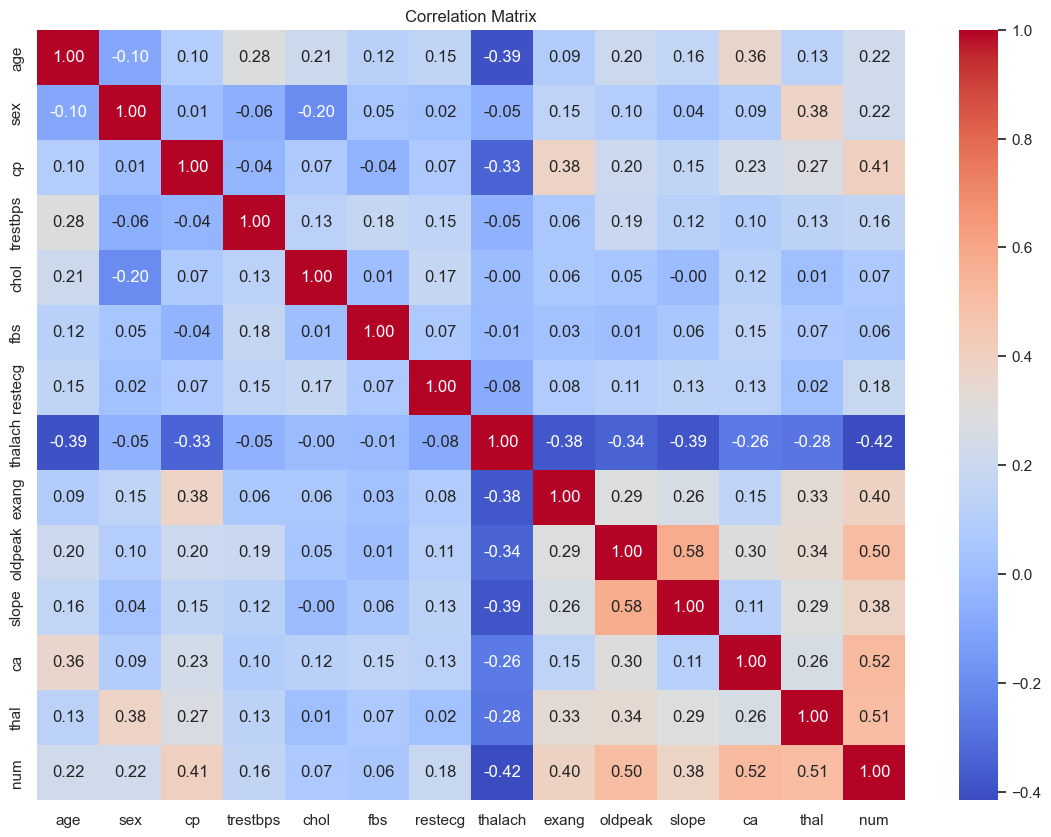

C:\Users\aadip\anaconda3\envs\python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aadip\anaconda3\envs\python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aadip\anaconda3\envs\python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aadip\anaconda3\envs\python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

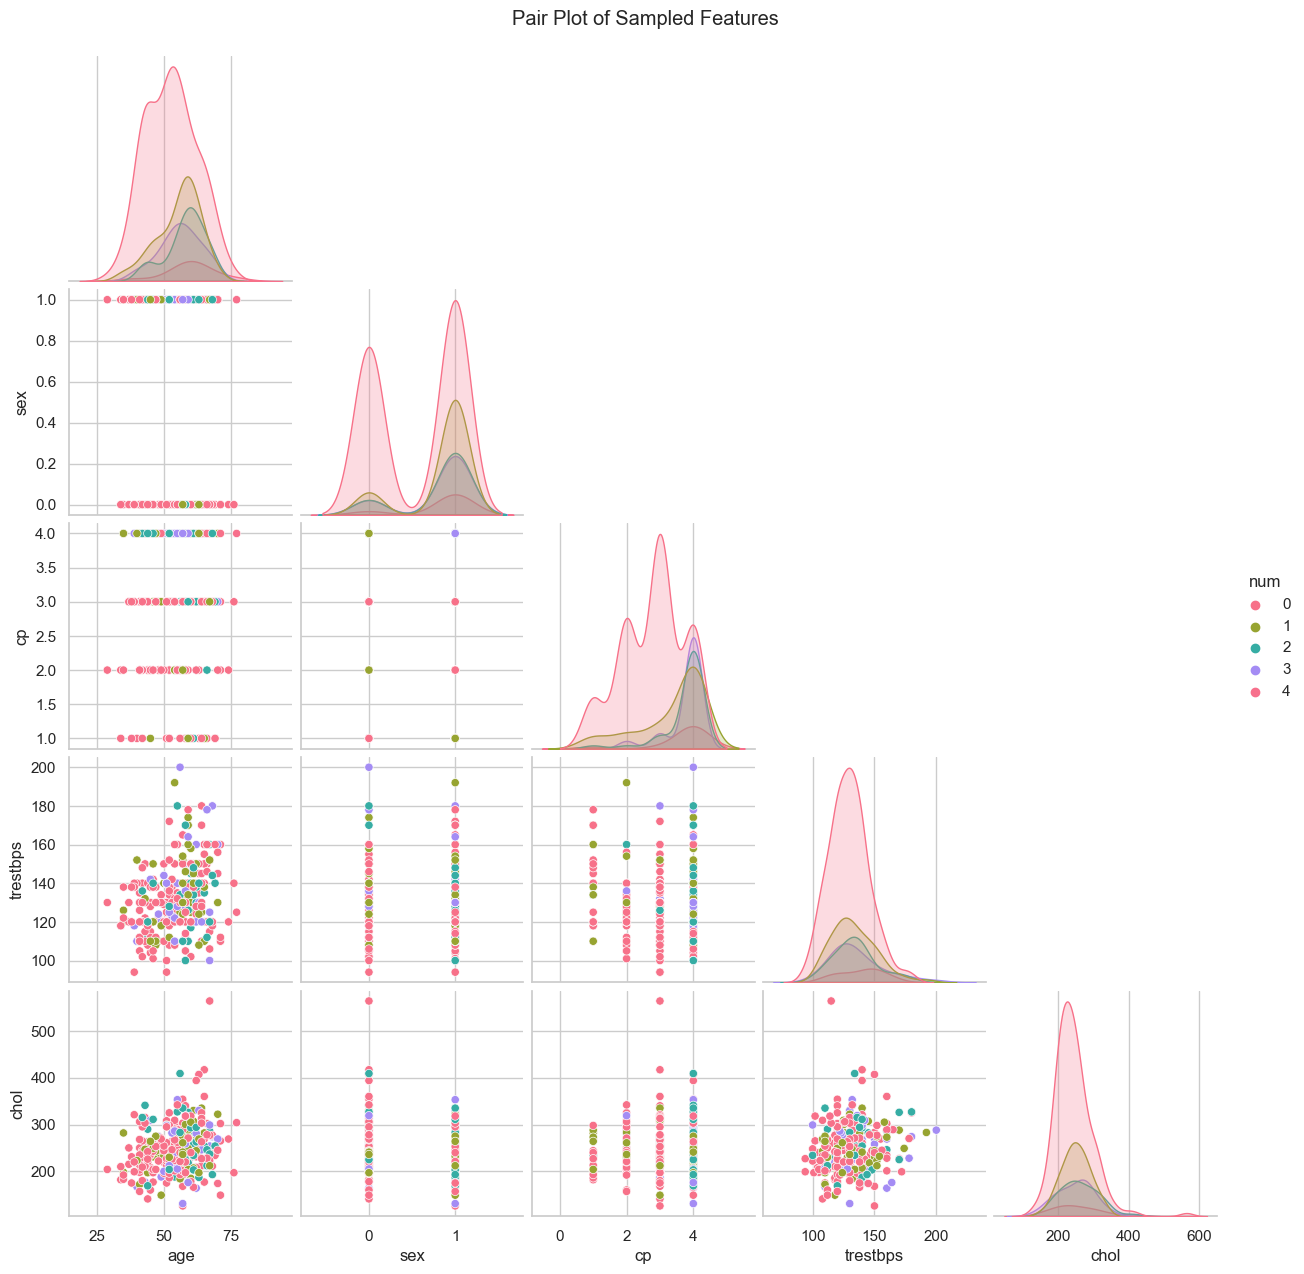

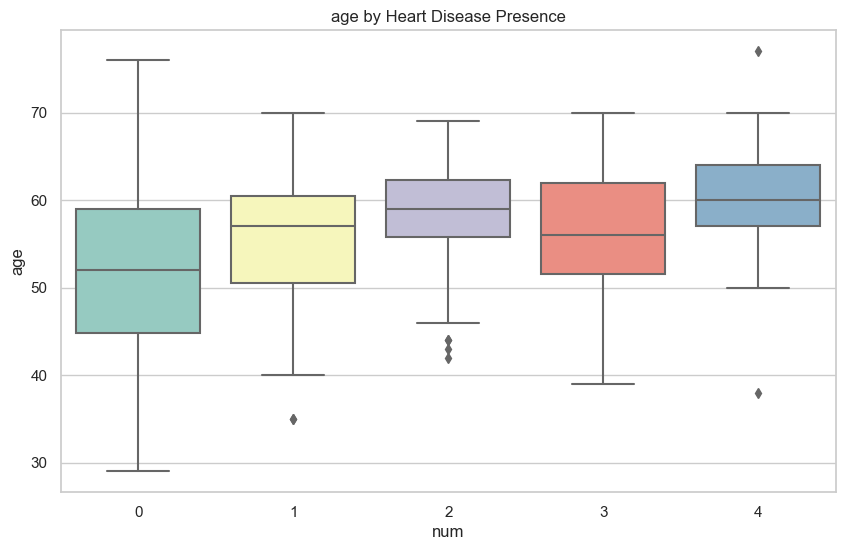

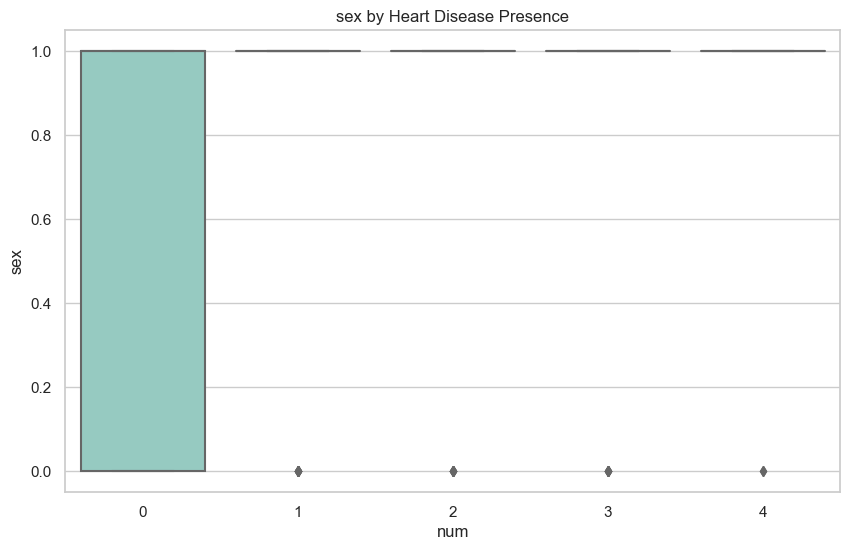

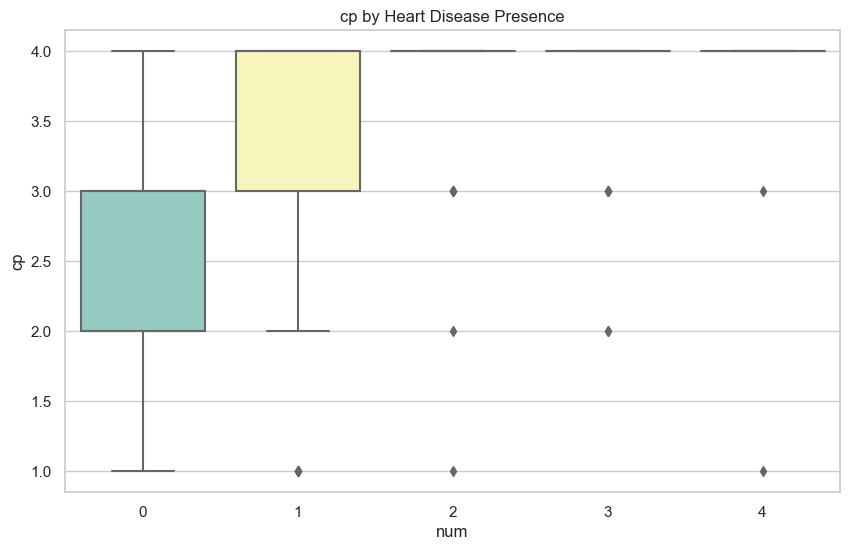

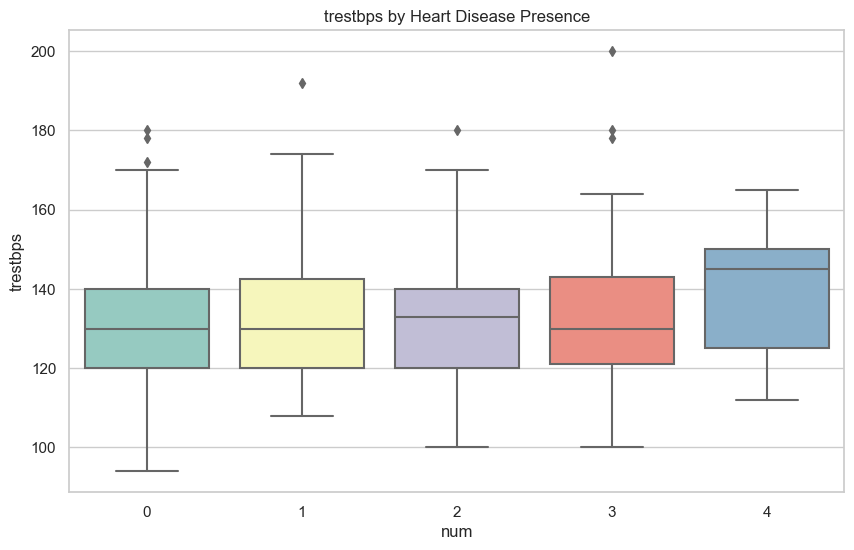

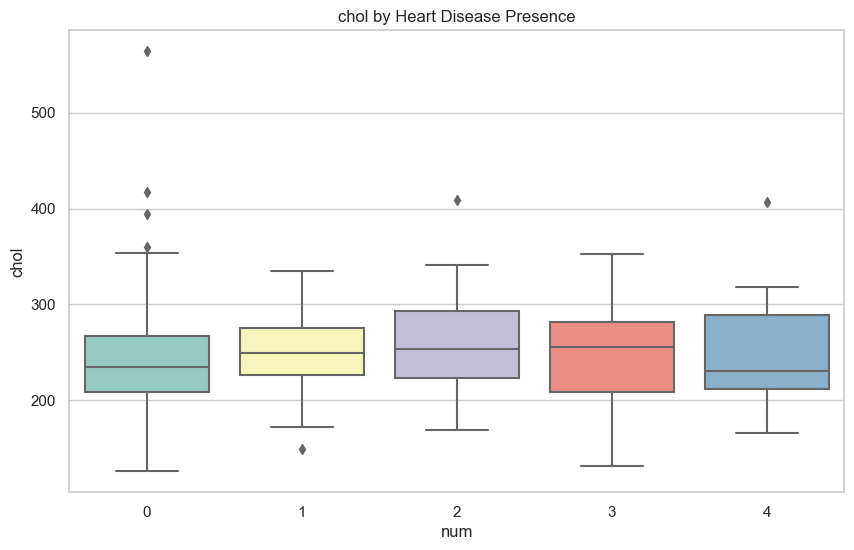

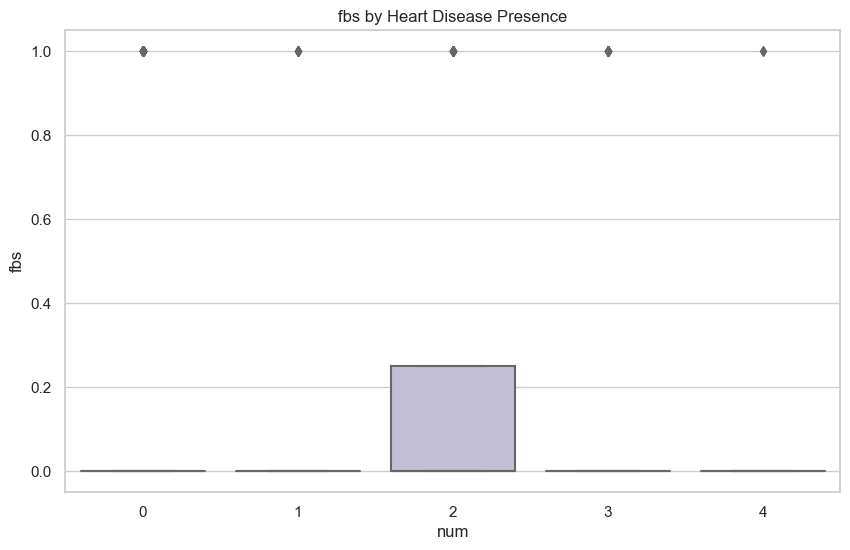

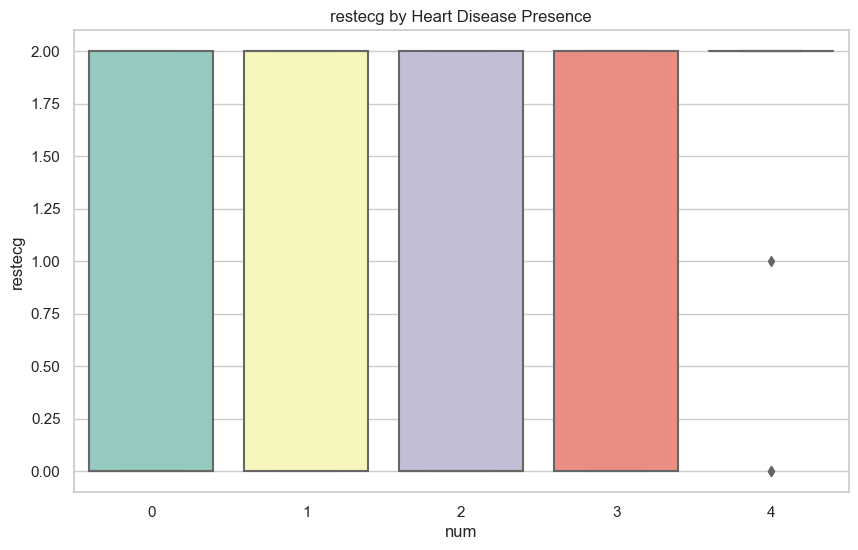

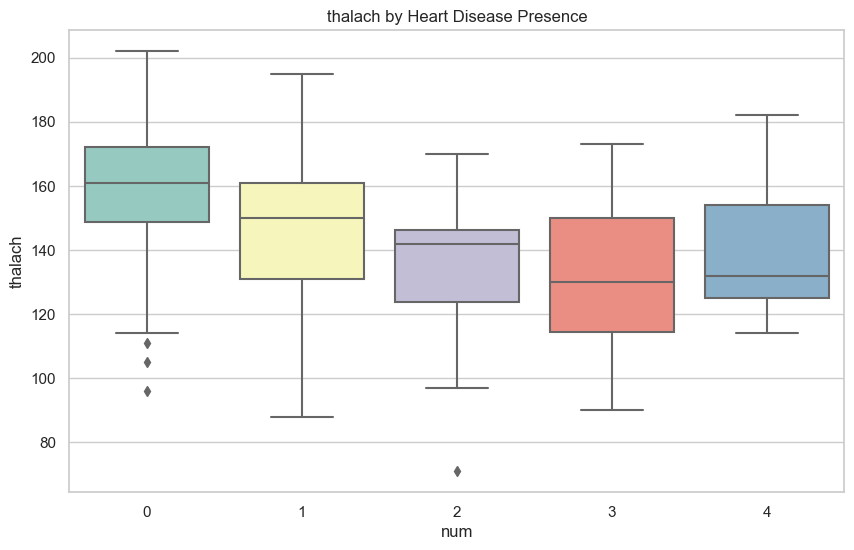

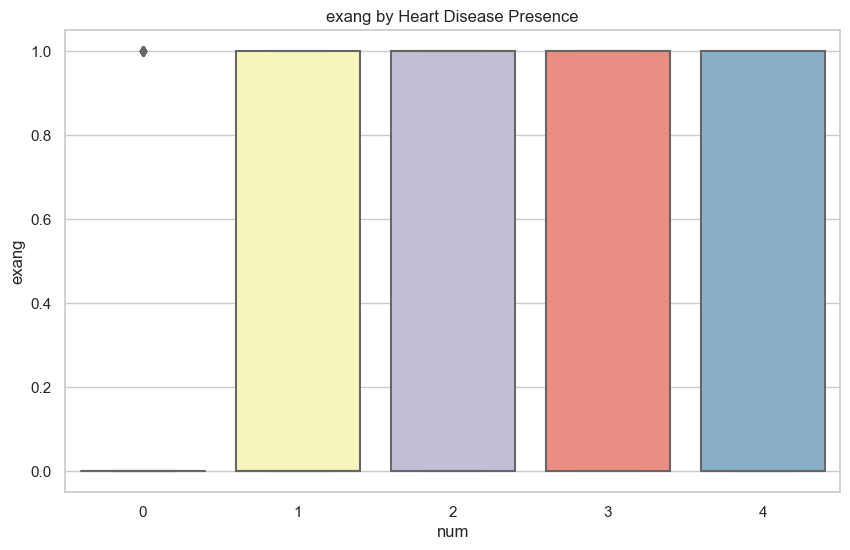

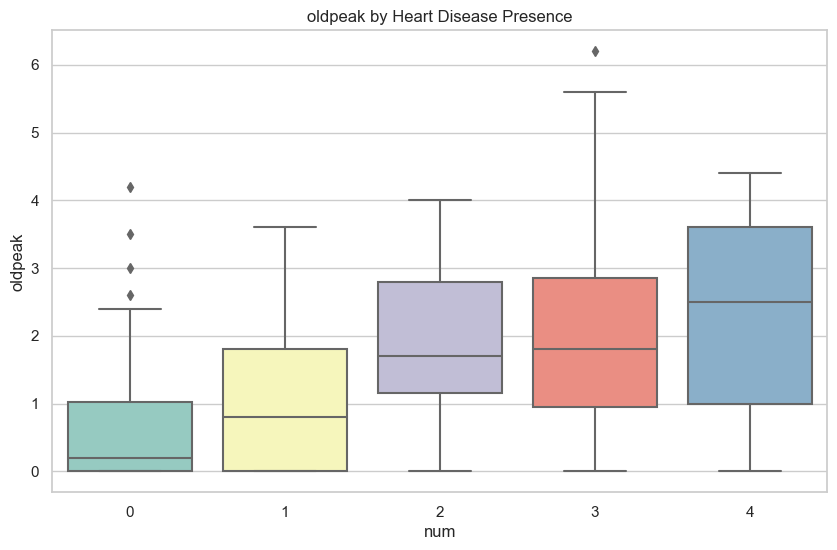

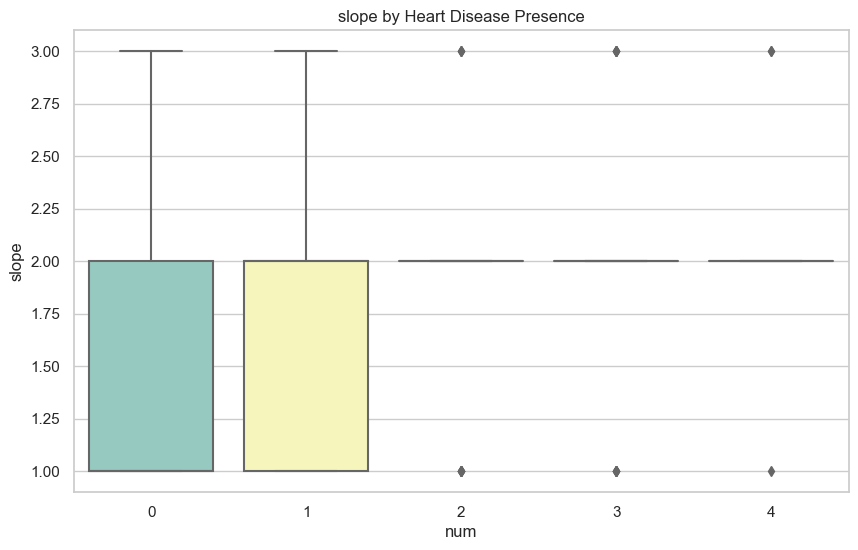

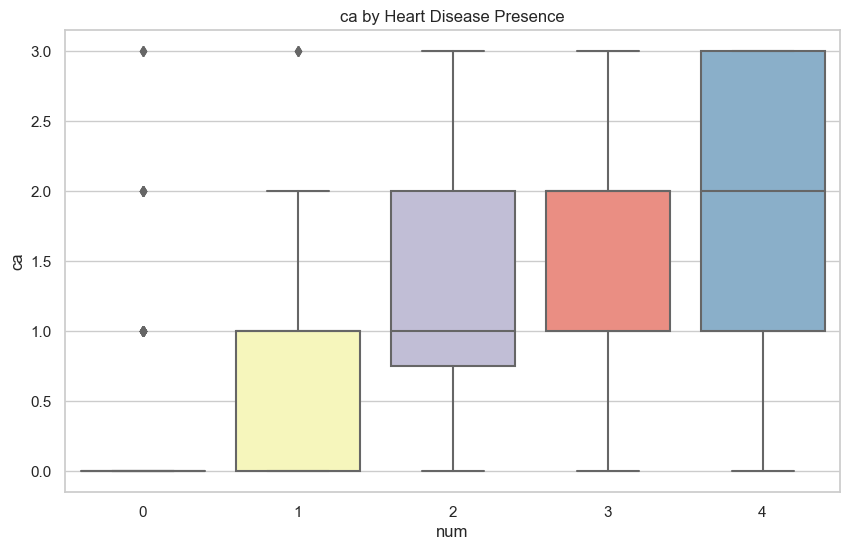

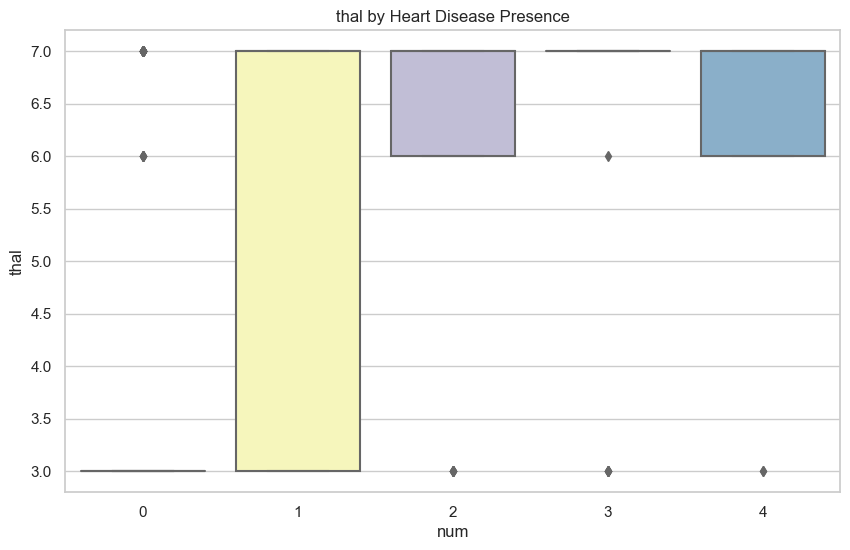


Skewness:
age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.189352
thal        0.244447
dtype: float64

Kurtosis:
age        -0.523383
sex        -1.408819
cp         -0.400655
trestbps    0.880074
chol        4.491724
fbs         1.959678
restecg    -1.999331
thalach    -0.053541
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.259256
thal       -1.917674
dtype: float64


In [4]:

# 1. Basic Info
# -----------------------------
print("Shape of the dataset:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)

print("\nFirst 5 rows of the dataset:")
print(df.head())

# -----------------------------
# 2. Missing Values
# -----------------------------
print("\nMissing Values per Column:")
print(df.isnull().sum())

# -----------------------------
# 3. Summary Statistics
# -----------------------------
print("\nSummary Statistics:")
print(df.describe())

# -----------------------------
# 4. Class Distribution (Target Variable)
# -----------------------------
target_col = y.columns[0]
print(f"\nTarget Variable Distribution ({target_col}):")
print(df[target_col].value_counts())

sns.countplot(data=df, x=target_col, palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel("Presence of Heart Disease")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 5. Correlation Matrix
# -----------------------------
correlation = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# -----------------------------
# 6. Pair Plot (Optional for small number of features)
# -----------------------------
# You can sample features if there are too many
sampled_cols = df.columns[:5].tolist() + [target_col]
sns.pairplot(df[sampled_cols], hue=target_col, palette='husl', corner=True)
plt.suptitle("Pair Plot of Sampled Features", y=1.02)
plt.show()

# -----------------------------
# 7. Boxplots by Target Variable
# -----------------------------
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x=target_col, y=col, palette='Set3')
    plt.title(f"{col} by Heart Disease Presence")
    plt.show()

# -----------------------------
# 8. Skewness and Kurtosis
# -----------------------------
print("\nSkewness:")
print(df[numeric_cols].skew())

print("\nKurtosis:")
print(df[numeric_cols].kurt())


In [5]:

df_cleaned = df.dropna()



In [6]:
# Define X and y
X = df_cleaned.drop(columns=['num'])
y = df_cleaned['num']


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Resampled class distribution:", pd.Series(y_resampled).value_counts())


Resampled class distribution: num
0    160
2    160
1    160
3    160
4    160
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression with softmax
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000,)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         7
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.32      0.33      0.32        60
weighted avg       0.55      0.60      0.57        60


Confusion Matrix:
 [[30  1  0  0  1]
 [ 6  3  2  0  0]
 [ 2  1  0  4  0]
 [ 0  0  3  3  1]
 [ 0  1  0  2  0]]


In [21]:
y_proba = model.predict_proba(X_test)
print("Softmax Probabilities (first 5 rows):\n", y_proba[:5])


Softmax Probabilities (first 5 rows):
 [[9.73760288e-01 2.41220590e-02 1.21188196e-03 6.54880707e-04
  2.50890581e-04]
 [9.91977527e-01 3.89214521e-03 2.40973184e-03 1.68824155e-03
  3.23543420e-05]
 [9.55765172e-01 3.86235637e-02 2.86615967e-03 2.37640288e-03
  3.68701295e-04]
 [9.63820159e-01 3.10792045e-02 4.24320449e-03 5.23531772e-04
  3.33899968e-04]
 [9.71690289e-01 2.44063227e-02 2.90390771e-03 7.22539947e-04
  2.76941005e-04]]


In [24]:
# Predict classes and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [25]:
# Metrics calculation
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
class_report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

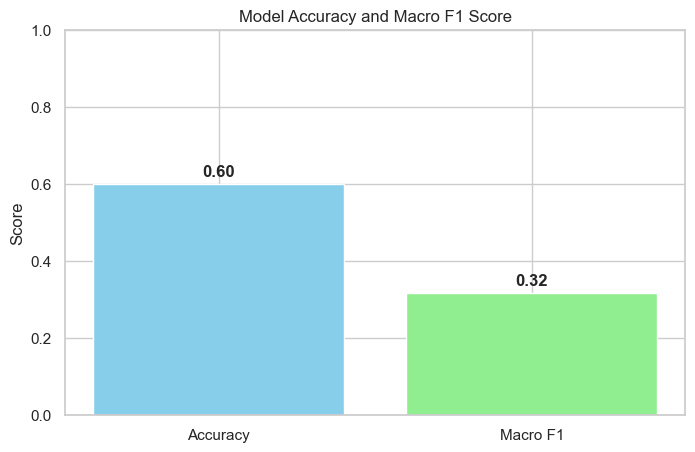

In [26]:
# Plot Accuracy and F1 Score as Bar Plot
plt.figure(figsize=(8,5))
plt.bar(['Accuracy', 'Macro F1'], [accuracy, f1_macro], color=['skyblue', 'lightgreen'])
plt.ylim([0, 1])
plt.title('Model Accuracy and Macro F1 Score')
plt.ylabel('Score')
for i, v in enumerate([accuracy, f1_macro]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

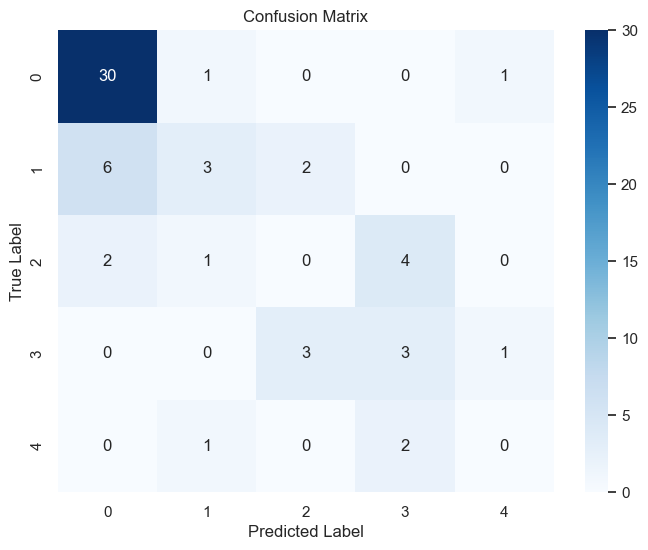

In [27]:

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

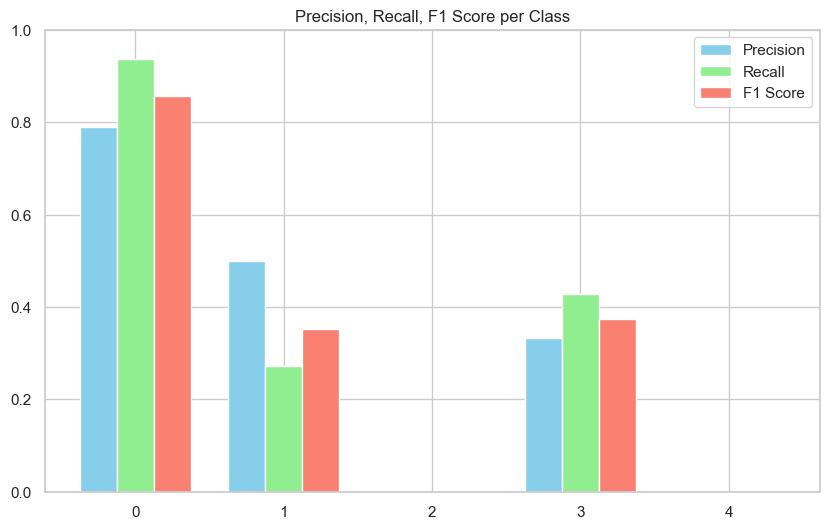

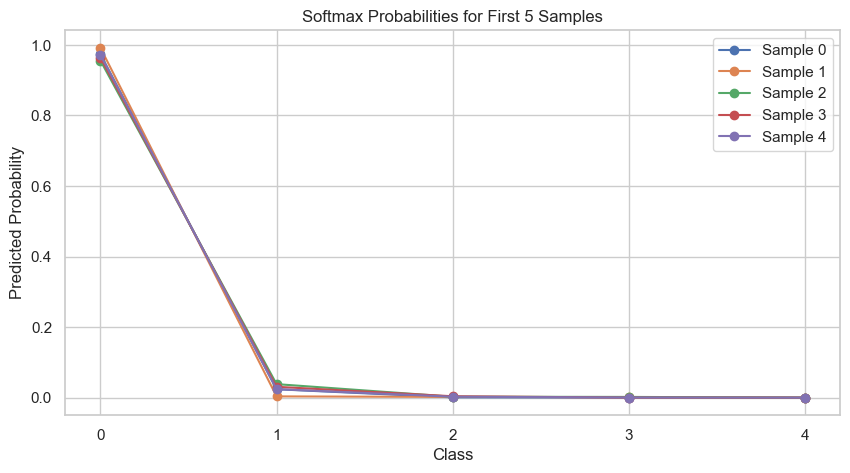

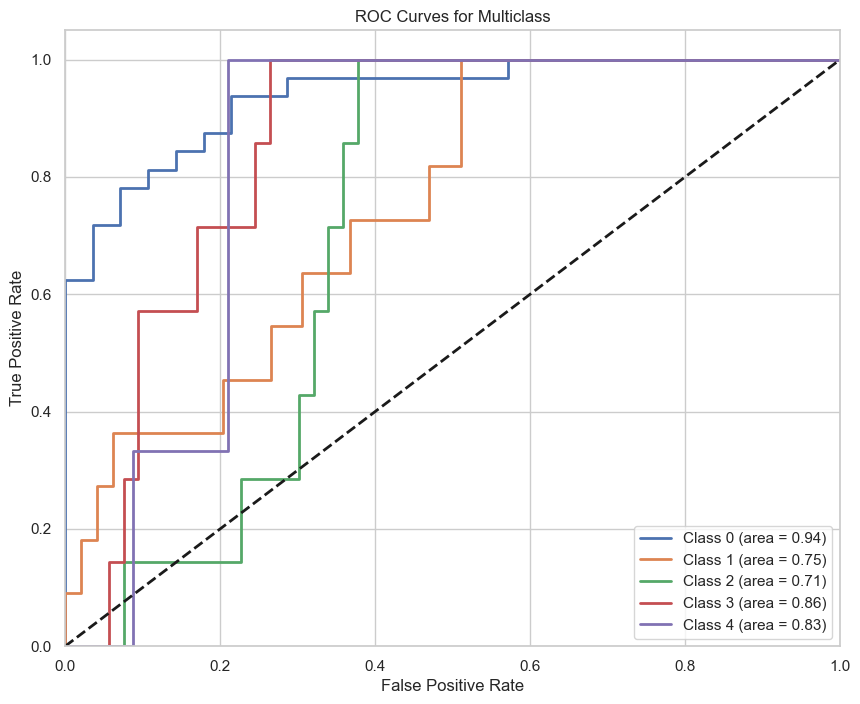

In [29]:
 #Plot Precision, Recall, F1-score per class
classes = list(class_report.keys())[:-3]  # exclude accuracy, macro avg, weighted avg
precision = [class_report[c]['precision'] for c in classes]
recall = [class_report[c]['recall'] for c in classes]
f1 = [class_report[c]['f1-score'] for c in classes]

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width=width, label='Precision', color='skyblue')
plt.bar(x, recall, width=width, label='Recall', color='lightgreen')
plt.bar(x + width, f1, width=width, label='F1 Score', color='salmon')
plt.xticks(x, classes)
plt.ylim([0,1])
plt.title('Precision, Recall, F1 Score per Class')
plt.legend()
plt.show()

# Plot Softmax Probability Distribution for first 5 samples
plt.figure(figsize=(10,5))
for i in range(min(5, len(y_proba))):
    plt.plot(y_proba[i], marker='o', label=f'Sample {i}')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.title('Softmax Probabilities for First 5 Samples')
plt.legend()
plt.show()

# Optional: ROC Curve for multiclass (requires binarized y)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10,8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass')
plt.legend(loc='lower right')
plt.show()